# Assignment 7


You will demonstrate your ability to create and train Neural Network models.

You will *only* use `Dense` layers.

# Objectives

This is a "doing" rather than "thinking" assignment.

Your goal is to checkpoint your skills to see if they are sufficient to create, train, and evaluate
Neural Network models.

# Submission guidelines

There are some specified tasks you must carry out, which involve playing around with a number of models.

We want to be able to evaluate *your best model* on a holdout dataset.

To faciliate this,
in addition to providing your notebook, we will ask you to create the subroutine `MyModel`
described below **and submit one additional file** to be described.

You will choose your *best model* and using the code provided in the cell below, save the model to a file and **submit the file with your saved model** along with the notebook.

The code cell below **should be the last cell in your notebook**.

The last cell:
- defines a routine to save a "model" object to a file
- defines a routine to load a model object from a file
- asks you to save the model for one of the tasks
- asks you to run `MyModel`

`MyModel` takes as arguments
- a test set: `x_test`, `y_test`
- name of a file containing a model object for a specified task

`MyModel` will load the file (i.e., restore the model) and run predictions on the test set.

You will need to complete the body of the `MyModel` definition.

We will run `MyModel` in that cell in order to load your saved model and run it
- We will not run any other cell in the notebook so if you need imports or anything else. put it there!  
- We **will not** run cells that train your model: that would take too long)
- If you need the holdout data to be transformed
    - the transformations should be called from `MyModel`
    - we will not run a cell to make the transformation happen

# HINT
**This is literally a give-away:** https://www.tensorflow.org/tutorials/keras/classification

## Additional submission

In addition to your notebook, please also submit the file whose name is stored in `model_path`.

**DO NOT** rename the file!


Here is the cell **that must appear as the last cell in your notebook**

# The problem

You will create several Neural Networks to solve a classification problem that is a slight variant
of the MNIST digit classification problem.

The assignment really involves little more than playing around with that example.

The objective is to ensure that you are able to write and run simple programs using Keras.

# The Data

The dataset is called Fashion MNIST.

Rather than classifying images into one of ten digits,
you will classify images of clothing items into one of ten classes.

Here's the code to get the data.

In [7]:
from tensorflow.keras.datasets import mnist, fashion_mnist, cifar10
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


## Data exploration

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [8]:
x_train.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [9]:
len(y_train)

60000

Labels are between 0 and 9 to designate a type of item :

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [11]:
x_test.shape

(10000, 28, 28)

## Preprocess the data

Data have value between 0 and 255.
We rescale them to values between 0 and 1.

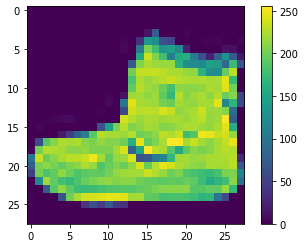

In [12]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
x_train = x_train / 255.0

x_test = x_test / 255.0

We can see now that the values are rescaled :

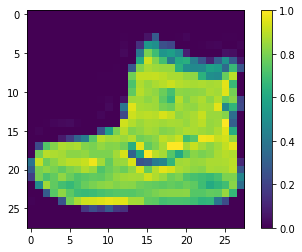

In [14]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

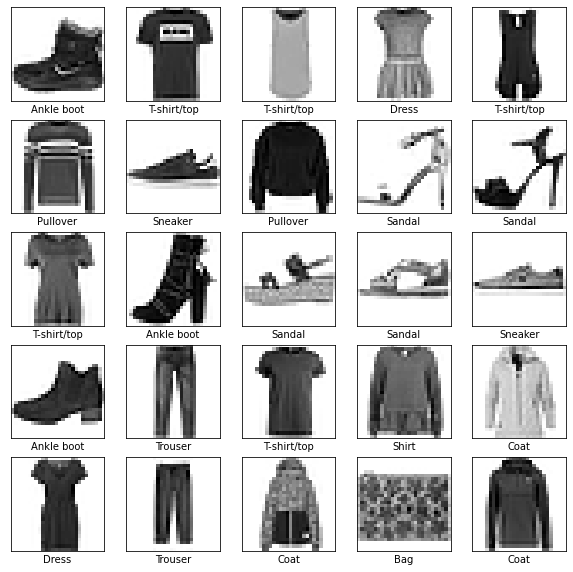

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Tasks

For each task
- create the Neural Network as specified
- train it on the training data set
- evaluate it on the test data set


## Task 1

Create a one layer Neural Network to perform classification (e.g., logistic regression) as we demonstrated in class.

No layers other than the one for classification.

#### Imports

In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#### Create model

In [8]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10,activation='sigmoid')
])

In [9]:
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Train model

In [10]:
model_1.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 466us/step - loss: 0.7689 - accuracy: 0.7465
Epoch 2/10
1875/1875 [==============================] - 1s 469us/step - loss: 0.4690 - accuracy: 0.8399
Epoch 3/10
1875/1875 [==============================] - 1s 460us/step - loss: 0.4324 - accuracy: 0.8532
Epoch 4/10
1875/1875 [==============================] - 1s 503us/step - loss: 0.4210 - accuracy: 0.8556
Epoch 5/10
1875/1875 [==============================] - 1s 461us/step - loss: 0.4208 - accuracy: 0.8569
Epoch 6/10
1875/1875 [==============================] - 1s 460us/step - loss: 0.4083 - accuracy: 0.8585
Epoch 7/10
1875/1875 [==============================] - 1s 449us/step - loss: 0.3969 - accuracy: 0.8609
Epoch 8/10
1875/1875 [==============================] - 1s 452us/step - loss: 0.3945 - accuracy: 0.8647
Epoch 9/10
1875/1875 [==============================] - 1s 448us/step - loss: 0.3929 - accuracy: 0.8641
Epoch 10/10
1875/1875 [==============================] - 1s 455u

#### Accuracy on holdout set

In [11]:
test_loss, test_acc = model_1.evaluate(x_test,  y_test, verbose=0)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.8440999984741211


# Task 2 (9 parts)

You will evaluate out of sample accuracy for several models and create a plot
- For number of layers in 2, 3,4 (more if you like)
- For number of units per layer in 10, 50, 200 (more if you like)
    - Using *same* number of units for each layer

The combination of choices for number of layers and number of units per layer gives you (at least) 9 models.

- Evaluate the out of sample accuracy for each of the 9 models.
- Present the results in a table (created by code)
- Create a *single plot*
    - Horizontal axis: number of units per layer
    - Vertical axis: out of sample accuracy
    - 3 traces in the plot, one for each choice of number of layers
        - e.g., one line in the plot for L=2, another line in the plot for L=3, and another line for L=4


#### Create models

In [12]:
def create_model(n_layers,n_units):
    
    l=[tf.keras.layers.Flatten(input_shape=(28, 28))]
    l+=[tf.keras.layers.Dense(n_units,activation='relu') for i in range(n_layers-1)]
    l+=[tf.keras.layers.Dense(10)]
    
    model = tf.keras.Sequential(l)
    
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    return model

In [50]:
models=[]
layers=[2,3,4]
units=[10,50,200]

for n_layers in layers:
    for n_units in units:
        model=create_model(n_layers,n_units)
        models.append(model)

#### Training

In [51]:
for model in models:
    model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 494us/step - loss: 0.9352 - accuracy: 0.6689
Epoch 2/10
1875/1875 [==============================] - 1s 487us/step - loss: 0.4956 - accuracy: 0.8276
Epoch 3/10
1875/1875 [==============================] - 1s 482us/step - loss: 0.4413 - accuracy: 0.8457
Epoch 4/10
1875/1875 [==============================] - 1s 490us/step - loss: 0.4280 - accuracy: 0.8510
Epoch 5/10
1875/1875 [==============================] - 1s 513us/step - loss: 0.4156 - accuracy: 0.8541
Epoch 6/10
1875/1875 [==============================] - 1s 539us/step - loss: 0.4046 - accuracy: 0.8567
Epoch 7/10
1875/1875 [==============================] - 1s 502us/step - loss: 0.3961 - accuracy: 0.8609
Epoch 8/10
1875/1875 [==============================] - 1s 483us/step - loss: 0.3894 - accuracy: 0.8605
Epoch 9/10
1875/1875 [==============================] - 1s 501us/step - loss: 0.3823 - accuracy: 0.8643
Epoch 10/10
1875/1875 [==============================] - 1s 514u

#### Accuracy on houldout set

In [52]:
test_accuracies=[]
for model in models:
    _,test_acc = model.evaluate(x_test,  y_test, verbose=1)
    test_accuracies.append(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3465 - accuracy: 0.8873


#### Plot

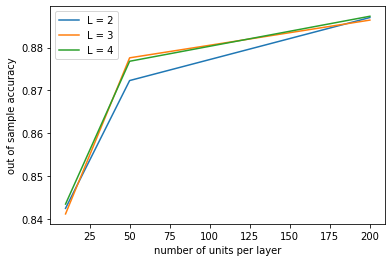

In [53]:
test_accuracies_l2=test_accuracies[:3]
test_accuracies_l3=test_accuracies[3:6]
test_accuracies_l4=test_accuracies[6:]

plt.plot(units,test_accuracies_l2,label='L = 2')
plt.plot(units,test_accuracies_l3,label='L = 3')
plt.plot(units,test_accuracies_l4,label='L = 4')

plt.xlabel('number of units per layer')
plt.ylabel('out of sample accuracy')

plt.legend()

plt.show()


#### Best model

In [54]:
print('Best accuracy : ' + str(np.max(test_accuracies)))
print('Best model index: ' + str(np.argmax(test_accuracies)))

Best accuracy : 0.8873000144958496
Best model index: 8


### The best model is : 4 layers and 200 units

#### Overfitting

In [17]:
train_accuracies=[]
for model in models:
    _,train_acc = model.evaluate(x_train,  y_train, verbose=1)
    train_accuracies.append(train_acc)

1875/1875 [==============================] - 1s 741us/step - loss: 0.2206 - accuracy: 0.9165


In [46]:
layers=[2,3,4]
units=[10,50,200]
i=0
for n_layers in layers:
    for n_units in units:
        if train_accuracies[i] > test_accuracies[i]:
            print('The model using {} layers and {} units is overfitting because test accuracy is less than train accuracy'.format(n_layers,n_units))
    i+=1

The model using 2 layers and 10 units is overfitting because test accuracy is less than train accuracy
The model using 2 layers and 50 units is overfitting because test accuracy is less than train accuracy
The model using 2 layers and 200 units is overfitting because test accuracy is less than train accuracy
The model using 3 layers and 10 units is overfitting because test accuracy is less than train accuracy
The model using 3 layers and 50 units is overfitting because test accuracy is less than train accuracy
The model using 3 layers and 200 units is overfitting because test accuracy is less than train accuracy
The model using 4 layers and 10 units is overfitting because test accuracy is less than train accuracy
The model using 4 layers and 50 units is overfitting because test accuracy is less than train accuracy
The model using 4 layers and 200 units is overfitting because test accuracy is less than train accuracy


### We can see that all model are overfitting

# Extra credit
- Do a more extensive experiment
    - More layers
    - More choices for number of units per layer
    - Vary number of units per layer
        - Increase number of units with increasing layer number
        - Decrease number of units with increasing layer number
        - Find some other pattern for varying the number of units per layer
- Comment on when your models are either overfitting or underfitting
    - Use numeric justification
    

#### Create more models

In [18]:
def create_more_models(n_layers,n_units,pattern='fixed'):
    
    if pattern == 'fixed':
        
        l=[tf.keras.layers.Flatten(input_shape=(28, 28))]
        l+=[tf.keras.layers.Dense(n_units,activation='relu') for i in range(1,n_layers)]
        l+=[tf.keras.layers.Dense(10)]

        model = tf.keras.Sequential(l)

        model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

        return model
    
    elif pattern == 'increasing':
        
        base=10
        
        l=[tf.keras.layers.Flatten(input_shape=(28, 28))]
        l+=[tf.keras.layers.Dense(base*i,activation='relu') for i in range(1,n_layers)]
        l+=[tf.keras.layers.Dense(10)]

        model = tf.keras.Sequential(l)

        model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

        return model
    
    elif pattern == 'decreasing':

        base=100

        l=[tf.keras.layers.Flatten(input_shape=(28, 28))]
        l+=[tf.keras.layers.Dense(int(base/i),activation='relu') for i in range(1,n_layers)]
        l+=[tf.keras.layers.Dense(10)]

        model = tf.keras.Sequential(l)

        model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

        return model

    elif pattern == 'custom':
    
        def custom(n):
            if (n<n_layers//2):
                return int(10*n)
            else :
                return int(100-10*n)
    
        l=[tf.keras.layers.Flatten(input_shape=(28, 28))]
        l+=[tf.keras.layers.Dense(custom(i),activation='relu') for i in range(1,n_layers)]
        l+=[tf.keras.layers.Dense(10)]

        model = tf.keras.Sequential(l)

        model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

        return model
    
    else :
        raise Exception('pleace select a valid pattern')

In [19]:
extra_models=[]
layers=[5,7,9]
units=[100,200,300]
patterns=['fixed','increasing','decreasing','custom']

for n_layers in layers:
    for n_units in units:
        for pattern in patterns:
            model=create_more_models(n_layers,n_units,pattern)
            extra_models.append(model)

#### Train more models

In [20]:
for model in extra_models:
    model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 750us/step - loss: 0.6513 - accuracy: 0.7609
Epoch 2/10
1875/1875 [==============================] - 1s 760us/step - loss: 0.3820 - accuracy: 0.8586
Epoch 3/10
1875/1875 [==============================] - 1s 770us/step - loss: 0.3397 - accuracy: 0.8727
Epoch 4/10
1875/1875 [==============================] - 2s 801us/step - loss: 0.3143 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 1s 793us/step - loss: 0.2966 - accuracy: 0.8883
Epoch 6/10
1875/1875 [==============================] - 1s 793us/step - loss: 0.2856 - accuracy: 0.8929
Epoch 7/10
1875/1875 [==============================] - 2s 801us/step - loss: 0.2666 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 2s 813us/step - loss: 0.2584 - accuracy: 0.9027
Epoch 9/10
1875/1875 [==============================] - 2s 803us/step - loss: 0.2490 - accuracy: 0.9062
Epoch 10/10
1875/1875 [==============================] - 2s 807u

1875/1875 [==============================] - 1s 651us/step - loss: 0.3536 - accuracy: 0.8690
Epoch 9/10
1875/1875 [==============================] - 1s 649us/step - loss: 0.3421 - accuracy: 0.8732
Epoch 10/10
1875/1875 [==============================] - 1s 645us/step - loss: 0.3375 - accuracy: 0.8742
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6638 - accuracy: 0.7558
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3965 - accuracy: 0.8554
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3530 - accuracy: 0.8745
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3248 - accuracy: 0.8810
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3088 - accuracy: 0.8888
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2995 - accuracy: 0.8911
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2889 - a

1875/1875 [==============================] - 1s 691us/step - loss: 0.3868 - accuracy: 0.8583
Epoch 7/10
1875/1875 [==============================] - 1s 689us/step - loss: 0.3748 - accuracy: 0.8628
Epoch 8/10
1875/1875 [==============================] - 1s 689us/step - loss: 0.3760 - accuracy: 0.8607
Epoch 9/10
1875/1875 [==============================] - 1s 691us/step - loss: 0.3655 - accuracy: 0.8669
Epoch 10/10
1875/1875 [==============================] - 1s 686us/step - loss: 0.3552 - accuracy: 0.8691
Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7489 - accuracy: 0.7235
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4419 - accuracy: 0.8456
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3878 - accuracy: 0.8644
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3539 - accuracy: 0.8763
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3388

#### Accuracy on hold-out set

In [32]:
extra_test_accuracies=[]
for model in extra_models:
    _,test_acc = model.evaluate(x_test,  y_test, verbose=0)
    extra_test_accuracies.append(test_acc)

In [34]:
print('Best accuracy : ' + str(np.max(extra_test_accuracies)))
print('Best model index: ' + str(np.argmax(extra_test_accuracies)))

Best accuracy : 0.8841999769210815
Best model index: 0


### The best model is : 5 layers and 100 units (fixed). But the prevous best model has better accuracy.

#### Overfitting

In [33]:
extra_train_accuracies=[]
for model in extra_models:
    _,train_acc = model.evaluate(x_train,  y_train, verbose=0)
    extra_train_accuracies.append(train_acc)

In [49]:
layers=[5,7,9]
units=[100,200,300]
patterns=['fixed','increasing','decreasing','custom']
i=0
for n_layers in layers:
    for n_units in units:
        for pattern in patterns:
            if extra_train_accuracies[i] > extra_test_accuracies[i]:
                print('The model using {} layers and {} units is overfitting because test accuracy is less than train accuracy'.format(n_layers,n_units))
    i+=1

The model using 5 layers and 100 units is overfitting because test accuracy is less than train accuracy
The model using 5 layers and 100 units is overfitting because test accuracy is less than train accuracy
The model using 5 layers and 100 units is overfitting because test accuracy is less than train accuracy
The model using 5 layers and 100 units is overfitting because test accuracy is less than train accuracy
The model using 5 layers and 200 units is overfitting because test accuracy is less than train accuracy
The model using 5 layers and 200 units is overfitting because test accuracy is less than train accuracy
The model using 5 layers and 200 units is overfitting because test accuracy is less than train accuracy
The model using 5 layers and 200 units is overfitting because test accuracy is less than train accuracy
The model using 5 layers and 300 units is overfitting because test accuracy is less than train accuracy
The model using 5 layers and 300 units is overfitting because te

### We can see that all model are overfitting

# Last Cell

In [17]:
import os
from tensorflow.keras.models import load_model
import numpy as np
import tensorflow as tf

modelName = "assignment7_best_model"
model_path = os.path.join(".", modelName)   

def saveModel(model, model_path): 
    try:
        os.makedirs(model_path)
    except OSError:
        print("Directory {dir:s} already exists, files will be over-written.".format(dir=model_path))
        
    # Save JSON config to disk
    json_config = model.to_json()
    with open(os.path.join(model_path, 'config.json'), 'w') as json_file:
        json_file.write(json_config)
    # Save weights to disk
    model.save_weights(os.path.join(model_path, 'weights.h5'))
    
    print("Model saved in directory {dir:s}; create an archive of this directory and submit with your assignment.".format(dir=model_path))
    
def loadModel(model_path):
    # Reload the model from the 2 files we saved
    with open(os.path.join(model_path, 'config.json')) as json_file:
        json_config = json_file.read()
    model = tf.keras.models.model_from_json(json_config)
    model.load_weights(os.path.join(model_path, 'weights.h5'))
    
    return model

def MyModel(x_test, y_test, model_path):
    # YOU MAY NOT change model after this statement !
    model = loadModel(model_path)
    
    # It should run model to create an array of predictions; we initialize it to the empty array for convenience
    predictions = []
    
    x_test = x_test / 255.0
    
    predictions = np.argmax(model.predict(x_test), axis=-1)
    
    
    return predictions

# Assign to variable my_model the model that solves task 3.2
my_model = models[8]

saveModel(my_model, model_path)
predicts = MyModel(x_test, y_test, model_path)